# PCA and kernel PCA explained

This notebook is the companion to our tutorial on PCA and __[kernel PCA available here](https://nirpyresearch.com/pca-kernel-pca-explained/)__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def pca(X, n_components=2):
    
    # Presprocessing - Standard Scaler
    X_std = StandardScaler().fit_transform(X)
    
    #Calculate covariance matrix
    cov_mat = np.cov(X_std.T)
    
    # Get eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat) 
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    matrix_w = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
    
    # Get the PCA reduced data
    Xpca = X_std.dot(matrix_w)

    return Xpca

In [3]:
data = pd.read_csv('../data/plums.csv')
X = data.values[:,1:]
Xstd = StandardScaler().fit_transform(X)

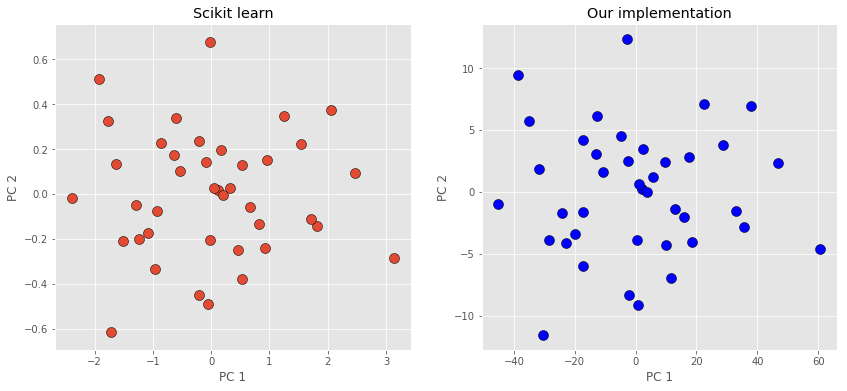

In [4]:
# Scikit-learn PCA
pca1 = PCA(n_components=2)
Xpca1 = pca1.fit_transform(X)
# Our implementation
Xpca2 = pca(X, n_components=2)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xpca1[:,0], Xpca1[:,1], s=100, edgecolors='k')   
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')
    
    ax[1].scatter(Xpca2[:,0], Xpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation')
    plt.show()

In [7]:
def ker_pca(X, n_components=3, gamma = 0.01):
    
    # Calculate euclidean distances of each pair of points in the data set
    dist = euclidean_distances(X, X, squared=True)
    
    # Calculate Kernel matrix
    K = np.exp(-gamma * dist)
    Kc = KernelCenterer().fit_transform(K)
    
    # Get eigenvalues and eigenvectors of the kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kc)
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])

    return Xkpca

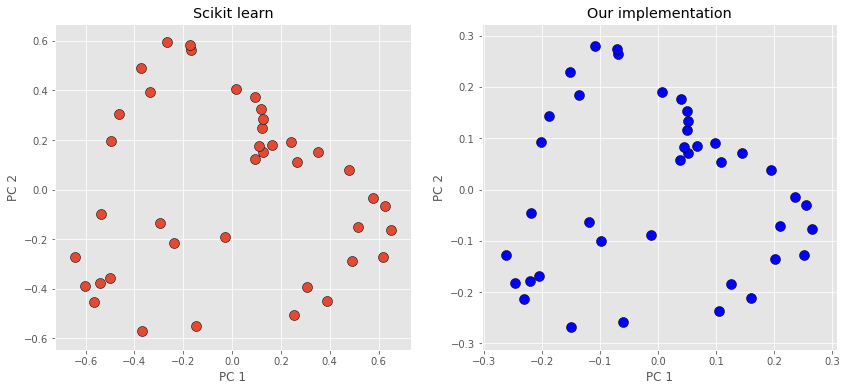

In [8]:
kpca1 = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(Xstd)

Xkpca2 = ker_pca(Xstd)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xkpca1[:,0], Xkpca1[:,1], s=100, edgecolors='k')   
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')
    
    ax[1].scatter(Xkpca2[:,0], Xkpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation')
    plt.show()